·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [1]:
import pandas as pd

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)

In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
import seaborn as sn

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<AxesSubplot:ylabel='MEDV'>

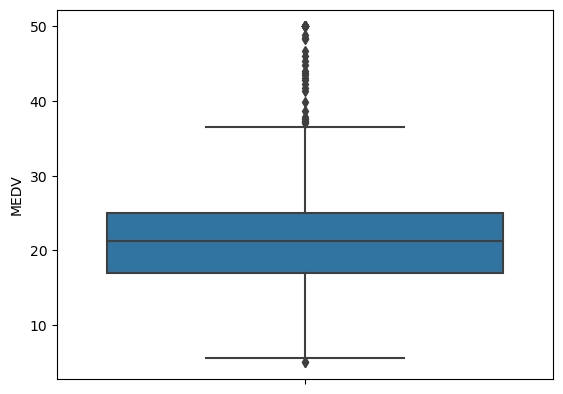

In [6]:
# Median value of owner-occupied homes
sn.boxplot(y=df.MEDV)

The values of MEDV span from 5 to 50 however the majority of values lay between ~18 and ~25 with the median of 21

<AxesSubplot:ylabel='CHAS'>

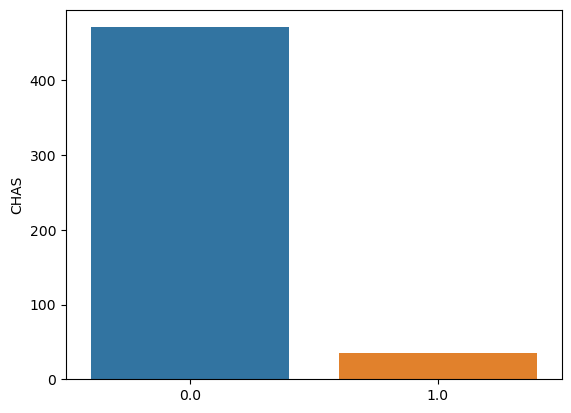

In [7]:
# Charles river
sn.barplot(x=df.CHAS.unique(), y=df.CHAS.value_counts())

The majority of categories in the dataset is labelled as 0

<AxesSubplot:xlabel='age_categories', ylabel='MEDV'>

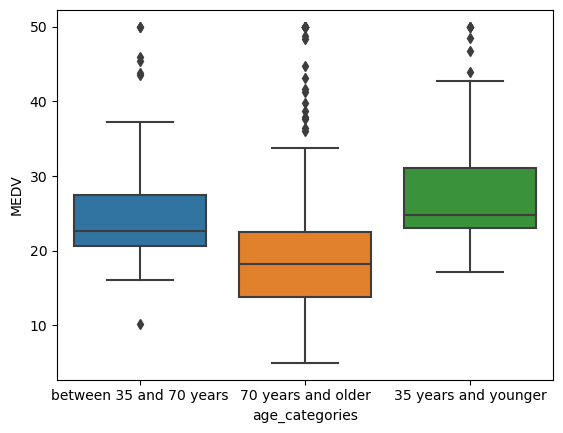

In [8]:
# MEDV variable vs the AGE variable.

def contanerize_age(row):
    if row <= 35:
        return '35 years and younger'
    elif row > 35 and row < 70:
        return 'between 35 and 70 years'
    elif row >= 70:
        return '70 years and older'
    
    
df['age_categories'] = df.AGE.apply(contanerize_age)
sn.boxplot(x='age_categories', y='MEDV', data=df)

Surprisinlgy, the youngest population owns the most expensive households

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

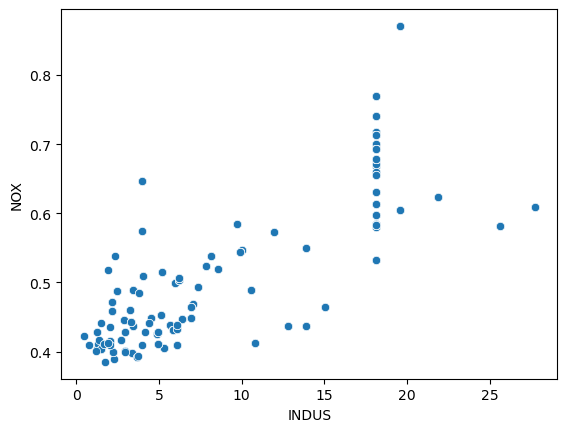

In [9]:
# relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
sn.scatterplot(y='NOX', x='INDUS', data=df)

The bigger proportion of business, the bigger is the concentration of nitric oxides

<AxesSubplot:ylabel='PTRATIO'>

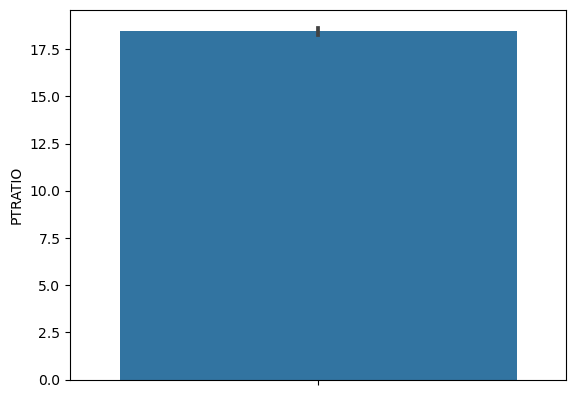

In [11]:
sn.barplot( y='PTRATIO', data=df)

There is no data on the cities, hence, the method asked in the question is not a helpful way to see the data

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

In [12]:
from statsmodels.stats.weightstats import ttest_ind
t_statistic, p_value,_ = ttest_ind(df['CHAS'], df['MEDV'], alternative='two-sided')

In [13]:
t_statistic

-54.92102897452032

In [14]:
p_value

1.4651540072345995e-305

With alpha = 0.05, and the following assumptions:
 - H0: There is no difference in median values of houses bounded Charles rives
 - H1: There is a difference in median values of houses bounded Charles rives
 
Since the p_value < alpha, we reject H0

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

In [15]:
from statsmodels.formula.api import ols
model = ols('MEDV ~ age_categories', data = df).fit()

In [16]:
import statsmodels.api as sm
anova = sm.stats.anova_lm(model)

In [17]:
anova

,df,sum_sq,mean_sq,F,PR(>F)
age_categories,2.0,5401.731883,2700.865942,36.40765,1.710501e-15
Residual,503.0,37314.563532,74.184023,NaN,NaN


With alpha = 0.05, and the following assumptions:
 - H0: There is no difference in median values of houses for proportion of owner occupied units. 
 - H1: There is a difference in median values of houses for proportion of owner occupied units. 
 
Since the p_value < alpha, we reject H0

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

In [18]:
import scipy
scipy.stats.pearsonr(df.NOX, df.INDUS)

PearsonRResult(statistic=0.7636514469209161, pvalue=7.913361061230596e-98)

With alpha = 0.05, and the following assumptions:
 - H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
 - H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
 
Since the p_value < alpha, we reject H0. We also see that there's a rather strong correlation between these two variables

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

In [24]:
X = df['DIS']
Y = df['MEDV']
X = sm.add_constant(X)

In [27]:
model = sm.OLS(Y, X)
findings = model.fit()
findings.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        22:29:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With alpha = 0.05, and the following assumptions:
 - H0: There is no impact of an additional weighted distance on the median value of owner occupied homes
 - H1: There is an impact of an additional weighted distance on the median value of owner occupied homes
 
Since the p_value < alpha, we reject H0.